In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [22]:
# gerais

import pandas as pd
from tqdm import tqdm


# Gensim
from nltk import tokenize
import gensim.corpora as corpora
from gensim.models import CoherenceModel

#plot
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim_models



import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from unidecode import unidecode


from string import punctuation

from gensim.models import LdaMulticore, CoherenceModel


In [78]:
df = pd.read_csv('../datasets/Fundamentos_Religiosos_2022_Telegram.csv')

In [75]:
len(df)

557586

In [79]:
df.columns

Index(['date_message', 'id_member_anonymous', 'id_group_anonymous', 'media',
       'media_type', 'media_url', 'has_media', 'has_media_url', 'trava_zap',
       'dataset_info_id', 'date_system', 'score_sentiment',
       'score_misinformation', 'id_message', 'id_persona', 'message_type',
       'messenger', 'media_name', 'media_md5', 'pre_processed_text'],
      dtype='object')

In [80]:
minimo = df['date_message'].min()
maximo = df['date_message'].max()

print(maximo)
print(minimo)

2022-11-11 12:09:48
2022-09-29 00:00:04


In [83]:
df['pre_processed_text'].head(30)

0     então é fato renato o áudio que eu ouvi no wha...
1     saiu no youtube do presidente a 8 horas atrás ...
2     é isso nossa parte já foi quase toda feita no ...
3              gente achei eles em uma seita maçonárica
4                                                   NaN
5     kķkkk to rindo até agora quem disse q ia fazer...
6      se alguém te perguntar o que foi que bolsonar...
7                                                   NaN
8                                                   NaN
9     o deputado federal pelo novo e que foi candida...
10    saiam desse grupo amigos bolsonaristas urgente...
11    gazprom da rússia retomamos o fornecimento de ...
12    saiam desse grupo amigos bolsonaristas urgente...
13    saiam desse grupo amigos bolsonaristas urgente...
14    saiam desse grupo amigos bolsonaristas urgente...
15                                                  NaN
16     olá seja bem vindo a - ao grupo especulando o...
17    saiam desse grupo amigos bolsonaristas urg

In [81]:
df.head()

,date_message,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5,pre_processed_text
0,2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Wanda Silva,Texto,telegram,NaN,NaN,então é fato renato o áudio que eu ouvi no wha...
1,2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Wanda Silva,Texto,telegram,NaN,NaN,saiu no youtube do presidente a 8 horas atrás ...
2,2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Wanda Silva,Texto,telegram,NaN,NaN,é isso nossa parte já foi quase toda feita no ...
3,2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Wanda Silva,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,gente achei eles em uma seita maçonárica
4,2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Wanda Silva,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637,NaN


In [6]:
df.columns

Index(['id_member_anonymous', 'id_group_anonymous', 'media', 'media_type',
       'media_url', 'has_media', 'has_media_url', 'trava_zap',
       'dataset_info_id', 'date_system', 'score_sentiment',
       'score_misinformation', 'id_message', 'id_persona', 'message_type',
       'messenger', 'media_name', 'media_md5', 'pre_processed_text'],
      dtype='object')

In [7]:
ids_para_remover = ['b73c0b674b28d87375d78dcae2f1a21f','62b3aa83e4df122e48cb1f97583e403f',
                    '893874da7344daaa00b8b5b3dc295b59','38737f3c7a07586c4efbfa39aa345705',
                    'da4cbbc1b7b1192ad83bcdae613ac2c3', 'bf66a467459264e0d33e4c8518a82827',
                    '46e009035e6150d656d0c194db88fb07','811541f6ce49347d1798e8dd2d3cbf83',
                    '1d2a0a63333d12ad188e9e6f7f2e0419','7c379613d4da713fe959d8c7ddc11ce2',
                    'debe17fd10d504076d2df8682f63bfc6','e9713ae04a02a810d6f33dd956f42794',
                    'd6c77928db26721ce46aca2d549780f0','8e53464d3b01eea3e39d07e51ecbb1b4',
                    'bacd40da04dd7d13f646993bdcf8e79d','2273d1167a6212812d95dc8fadbae78e',
                    'cd3bb1bdf75be7595e6373171a5c2225','add8c1ba533c5e5450d92c061a5ee7bf',
                    'e198f90df1995528531dd43db0c935ea', '06dc9ac55ed64caab2bd97e9ab717302',
                    'c0110feb539d212836605b66192722dd','f71912700ac5331415408ce229681359',
                    '2ee692357a9c948351c43a9540e859ae', '25b66278176dabe814dfc25a405a2470',
                    '08b21cb1e7de74ef5fe1085230075523']

In [8]:
# Filtrar o DataFrame para remover as linhas com esses IDs
df_filtrado = df[~df['id_member_anonymous'].isin(ids_para_remover)]
df_filtrado

,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5,pre_processed_text
date_message,,,,,,,,,,,,,,,,,,,
2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Wanda Silva,Texto,telegram,NaN,NaN,então é fato renato o áudio que eu ouvi no wha...
2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Wanda Silva,Texto,telegram,NaN,NaN,saiu no youtube do presidente a 8 horas atrás ...
2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Wanda Silva,Texto,telegram,NaN,NaN,é isso nossa parte já foi quase toda feita no ...
2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Wanda Silva,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,gente achei eles em uma seita maçonárica
2022-10-05 06:27:44,cd6979b0b5265f08468fa1689b6300ce,e56ec342fc599ebb4ed89655eb6f03aa,5ad5c8bbe9da93a37fecf3e5aa5b0637.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:28:29.316325,NaN,NaN,507185,Wanda Silva,Imagem,telegram,NaN,5ad5c8bbe9da93a37fecf3e5aa5b0637,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-11 12:06:15,333e9869f23dbd4682d1be382d9c1e59,e56ec342fc599ebb4ed89655eb6f03aa,25e43b6a58b848c43ad5b5f9e979822a.jpg,url,https://terrabrasilnoticias.com/2022/11/bndes-...,True,True,False,5,2022-11-16 14:49:39.146502,0.1027,NaN,575796,Wanda Silva,Url,telegram,NaN,25e43b6a58b848c43ad5b5f9e979822a,bndes tem lucro de r 9 6 bilhões no terceiro t...
2022-11-11 12:09:08,NaN,5b10d7739171149be6d9961e3350c071,657949d03e4088f6b332e2686ccd3221.jpg,url,https://youtu.be/8g1Vz9_0xVk,True,True,False,5,2022-11-16 14:49:39.847434,0.0000,NaN,1286443,Wanda Silva,Url,telegram,NaN,657949d03e4088f6b332e2686ccd3221,youtu be
2022-11-11 12:09:47,NaN,1590a03f43b5ba4b6147a1c5e1dd357b,a21848a61045380a6483866daed0ca0e.jpg,image/jpg,https://t.me/vemprasruas,True,True,False,5,2022-11-16 14:49:39.922279,0.0000,NaN,13294,Wanda Silva,Imagem,telegram,NaN,a21848a61045380a6483866daed0ca0e,empresários demitam os petistas primeiro t me


In [9]:
# Removendo linhas com valores NaN na coluna 'pre_processed_text'
df_filtrado = df_filtrado.dropna(subset=['pre_processed_text'])

# Removendo trava_zap
df_filtrado = df_filtrado[df_filtrado['trava_zap'] == False]



#df_filtrado = df_filtrado[0:100]
len(df_filtrado)

443759

In [10]:
token_espaco = tokenize.WhitespaceTokenizer()
token_pontuacao = tokenize.WordPunctTokenizer()

In [11]:

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('portuguese'))

def preprocess_text(text):

    # Função para extrair e substituir o domínio da URL
    def substituir_dominios(texto):
        # Função para extrair e substituir o domínio da URL
        def extrair_dominio(url):
            # Remove o protocolo (http://, https://, etc.) e o "www." se presente
            dominio = re.sub(r'^https?://(?:www\.)?|www\.', '', url)
            # Remove o caminho e parâmetros da URL
            dominio = re.split(r'[/?#]', dominio)[0]
            # Retorna a parte principal do domínio (antes do primeiro ponto)
            return dominio.split('.')[0]

        # Substitui URLs por seus domínios principais
        return re.sub(r'https?://(?:www\.)?\S+|www\.\S+', lambda match: extrair_dominio(match.group(0)), texto)

    # Substituir domínios
    text = substituir_dominios(text)

    # Converte para minúsculas
    text = text.lower()

    # Remove acentos
    text = unidecode(text)

    #Remover Pontuação
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove URLs e menções
    #text = re.sub(r'http\S+|www\S+|https\S+|@\w+', '', text)

    # Substitui emojis repetidos por apenas um
    text = re.sub(r'([\U00010000-\U0010FFFF])\1+', r'\1', text)
    text = re.sub(r'([\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF])\1+', r'\1', text)


    # Remove espaços em branco extras (início ou final) e múltiplos espaços no meio do texto
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove pontuações e caracteres especiais
    #text = re.sub(r'[^\w\s]', '', text)

    # Ajusta risadas "kkk" ou mais para "kk"
    text = re.sub(r'k{2,}|K{2,}', 'kk', text)

    # Ajusta risadas "haha" ou mais para "haha"
    text = re.sub(r'(ha){2,}', 'haha', text, flags=re.IGNORECASE)

    # Ajusta risadas "kaka" ou mais para "kaka"
    text = re.sub(r'(ka){2,}', 'kaka', text, flags=re.IGNORECASE)

    # Remove as stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])


    return text


[nltk_data] Downloading package punkt to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Melissa
[nltk_data]     Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:

df_geral = df_filtrado.copy()

# Aplicar o pré-processamento à coluna de texto
df_geral['text_processed'] = df_geral['pre_processed_text'].apply(preprocess_text)

In [13]:
df_geral.head()

,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5,pre_processed_text,text_processed
date_message,,,,,,,,,,,,,,,,,,,,
2022-10-05 06:25:04,1078cc958f0febe28f4d03207660715f,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.863641,0.0000,NaN,16385,Wanda Silva,Texto,telegram,NaN,NaN,então é fato renato o áudio que eu ouvi no wha...,entao fato renato audio ouvi whatsapp ocorreu ...
2022-10-05 06:25:08,NaN,12283e08a2eb5789201e105b34489ee7,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:25:28.926311,0.0644,NaN,16386,Wanda Silva,Texto,telegram,NaN,NaN,saiu no youtube do presidente a 8 horas atrás ...,saiu youtube presidente 8 horas atras infelizm...
2022-10-05 06:26:28,92a2d8fd7144074f659d1d29dc3751da,9f2d7394334eb224c061c9740b5748fc,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:26:29.361949,-0.3551,0.157242,16366,Wanda Silva,Texto,telegram,NaN,NaN,é isso nossa parte já foi quase toda feita no ...,parte ja quase toda feita segundo turno comple...
2022-10-05 06:27:28,d60aa38f62b4977426b70944af4aff72,c8f2de56550ed0bf85249608b7ead93d,94dca4cda503100ebfda7ce2bcc060eb.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:27:29.935624,0.0000,NaN,19281,Wanda Silva,Imagem,telegram,NaN,94dca4cda503100ebfda7ce2bcc060eb,gente achei eles em uma seita maçonárica,gente achei seita maconarica
2022-10-05 06:28:30,NaN,b52442a5fbc459ae590dca0d215e32f9,NaN,NaN,NaN,False,False,False,5,2022-10-05 06:29:29.046694,0.7003,0.197813,2735,Wanda Silva,Texto,telegram,NaN,NaN,kķkkk to rindo até agora quem disse q ia fazer...,kk to rindo ate agora disse q ia fazer acordo ...


### Calculando a diversidade dos tópicos
A diversidade de tópicos mede quantas palavras únicas existem entre os top-N termos de todos os tópicos. 

In [14]:

def topic_diversity(model, top_n=10):
    topic_words = []
    for k in range(model.num_topics):
        words = [word for word, _ in model.show_topic(k, topn=top_n)]
        topic_words.extend(words)
    unique_words = set(topic_words)
    return len(unique_words) / (top_n * model.num_topics)


### IRBO 

IRBO avalia quanto os tópicos são distintos entre si, usando o Rank-Biased Overlap (RBO) invertido. Quanto maior o IRBO, mais diferentes são os tópicos

In [15]:
import rbo

def compute_irbo(model, top_n=10):
    topics = []
    for k in range(model.num_topics):
        topic_terms = [word for word, _ in model.show_topic(k, topn=top_n)]
        topics.append(topic_terms)

    # Calcular média dos RBOs invertidos entre todos os pares
    n = len(topics)
    total_irbo = 0
    count = 0

    for i in range(n):
        for j in range(i + 1, n):
            rbo_score = rbo.RankingSimilarity(topics[i], topics[j]).rbo()
            total_irbo += (1 - rbo_score)
            count += 1

    return total_irbo / count if count > 0 else 0


## Modelando os Tópicos sem filtro

In [16]:
def processar_texto(texto):
    texto = texto.lower()
    palavras_texto = token_espaco.tokenize(texto)
    palavras_texto = token_pontuacao.tokenize(' '.join(palavras_texto))
    return [palavra for palavra in palavras_texto]

texto_processado = df_geral['text_processed'].apply(processar_texto)

In [17]:
# Criar dicionário
id2word = corpora.Dictionary(texto_processado)
# Criar o Corpus: A Frequência das palavras nos documentos
corpus = [id2word.doc2bow(text) for text in texto_processado]

Calculando coerência (c_npmi): 100%|██████████| 14/14 [44:45<00:00, 191.85s/it]


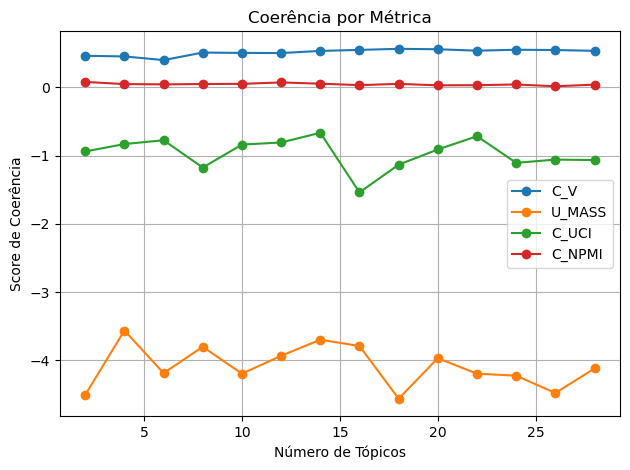


Resultados de Coerência para C_V:
Qtd. tópicos = 2 -> Coerência = 0.4626
Qtd. tópicos = 4 -> Coerência = 0.4533
Qtd. tópicos = 6 -> Coerência = 0.3996
Qtd. tópicos = 8 -> Coerência = 0.5103
Qtd. tópicos = 10 -> Coerência = 0.5049
Qtd. tópicos = 12 -> Coerência = 0.5033
Qtd. tópicos = 14 -> Coerência = 0.534
Qtd. tópicos = 16 -> Coerência = 0.549
Qtd. tópicos = 18 -> Coerência = 0.5647
Qtd. tópicos = 20 -> Coerência = 0.5584
Qtd. tópicos = 22 -> Coerência = 0.5378
Qtd. tópicos = 24 -> Coerência = 0.5511
Qtd. tópicos = 26 -> Coerência = 0.5472
Qtd. tópicos = 28 -> Coerência = 0.5352
Melhor número de tópicos segundo C_V: 18

Resultados de Coerência para U_MASS:
Qtd. tópicos = 2 -> Coerência = -4.5037
Qtd. tópicos = 4 -> Coerência = -3.5607
Qtd. tópicos = 6 -> Coerência = -4.1844
Qtd. tópicos = 8 -> Coerência = -3.7995
Qtd. tópicos = 10 -> Coerência = -4.1928
Qtd. tópicos = 12 -> Coerência = -3.9315
Qtd. tópicos = 14 -> Coerência = -3.6954
Qtd. tópicos = 16 -> Coerência = -3.7873
Qtd. tóp

In [18]:

# Função para determinar a melhor quantidade de tópicos para a modelagem
def compute_coherence_values(dictionary, corpus, texts, coherence, limit=30, start=2, step=5):
    coherence_values = []
    model_list = []
    topic_range = list(range(start, limit, step))

    for num_topics in tqdm(topic_range, desc=f"Calculando coerência ({coherence})"):
        model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=5, workers=4)
        model_list.append(model)

        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    optimal_index = coherence_values.index(max(coherence_values))
    optimal_num_topics = topic_range[optimal_index]
    return optimal_num_topics, model_list, coherence_values

# Calcular os valores de coerência para diferentes métricas
def calculate_coherence_for_metrics(dictionary, corpus, texts, metrics, start=2, limit=30, step=2):
    coherence_results = {}
    for metric in metrics:
        num_topics, model_list, coherence_values = compute_coherence_values(
            dictionary=dictionary,
            corpus=corpus,
            texts=texts,
            coherence=metric,
            start=start,
            limit=limit,
            step=step
        )
        coherence_results[metric] = {
            'num_topics': num_topics,
            'model_list': model_list,
            'coherence_values': coherence_values
        }
    return coherence_results

metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

# Calcular os valores de coerência 
coherence_results = calculate_coherence_for_metrics(
    dictionary=id2word,
    corpus=corpus,
    texts=texto_processado,
    metrics=metrics,
    start=2,
    limit=30,
    step=2
)

# Plotar os resultados de coerência para cada métrica
for metric in metrics:
    x = list(range(2, 30, 2))
    coherence_values = coherence_results[metric]['coherence_values']
    plt.plot(x, coherence_values, marker='o', label=metric.upper())

plt.xlabel("Número de Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(loc='best')
plt.title("Coerência por Métrica")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar os resultados de coerência para cada métrica
for metric in metrics:
    print(f"\nResultados de Coerência para {metric.upper()}:")
    for m, cv in zip(range(2, 30, 2), coherence_results[metric]['coherence_values']):
        print(f"Qtd. tópicos = {m} -> Coerência = {round(cv, 4)}")
    print(f"Melhor número de tópicos segundo {metric.upper()}: {coherence_results[metric]['num_topics']}")


In [19]:
# tamanho do corpus
len(corpus)


443759

In [23]:

pyLDAvis.enable_notebook()  


# Escolher a métrica para visualizar
chosen_metric = 'u_mass'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.094945  0.045986       1        1  34.009255
3     -0.185404  0.160618       2        1  29.931225
2     -0.029353 -0.289425       3        1  24.849706
0      0.309702  0.082821       4        1  11.209814, topic_info=           Term          Freq          Total Category  logprob  loglift
85           13  73856.000000   73856.000000  Default  30.0000  30.0000
495       grupo  46445.000000   46445.000000  Default  29.0000  29.0000
1174         be  69698.000000   69698.000000  Default  28.0000  28.0000
1364      youtu  68027.000000   68027.000000  Default  27.0000  27.0000
23      youtube  32516.000000   32516.000000  Default  26.0000  26.0000
...         ...           ...            ...      ...      ...      ...
65    bolsonaro   7053.675562   63432.767150   Topic4  -5.0343  -0.0081
177      brasil   6017.777942   51492.488206   Topic4  -5.1931   0.0417
36         deus   5178.624937   23452.313297   Topic4  -5.3433   0.6780
19          nao   6130.827763  163065.152722   Topic4  -5.1745  -1.0924
517     pessoas   5099.408388   20385.377787   Topic4  -5.3587   0.8027

[287 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
923       3  0.999927        0
77        1  0.054918       00
77        3  0.944994       00
78        2  0.001662      000
78        3  0.998314      000
...     ...       ...      ...
1364      2  0.999984    youtu
23        1  0.001445  youtube
23        2  0.000031  youtube
23        3  0.010887  youtube
23        4  0.987610  youtube

[498 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

In [24]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus))

Diversidade de Tópicos: 0.925
IRBO médio: 0.9334

Perplexidade:  -8.332344700482755


In [25]:
# Extrair tópicos (palavras e pesos)
topics_data = []
for topic_id, topic in lda_model.show_topics(formatted=False):
    for word, weight in topic:
        topics_data.append({
            'topic_id': topic_id,
            'word': word,
            'weight': weight
        })

# Criar DataFrame
topics_df = pd.DataFrame(topics_data)


# Salvar em CSV
topics_df.to_csv('./resultados_lda/telegram/lda_model_telegramSemFiltro_u_mass.csv', index=False, encoding='utf-8')


In [26]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_v'  # ou 'u_mass', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.254647 -0.001005       1        1  13.001133
0     -0.214842  0.042951       2        1  10.604919
12    -0.245408  0.092936       3        1   7.309515
2      0.234141  0.038212       4        1   6.955940
13    -0.001715 -0.279395       5        1   6.546635
4     -0.180112  0.009082       6        1   6.095743
3     -0.112319 -0.047406       7        1   5.809793
17     0.002922 -0.069352       8        1   5.722713
7     -0.130919 -0.039411       9        1   5.380646
16     0.052132 -0.035992      10        1   5.045787
9      0.183641 -0.180208      11        1   4.452638
15     0.005271 -0.224270      12        1   4.318708
10     0.117087  0.032628      13        1   4.232944
5      0.190914  0.133815      14        1   3.676047
8     -0.069609  0.164582      15        1   3.352601
14     0.228191  0.057628      16        1   2.740871
11    -0.016796  0.200672      17        1   2.643042
1      0.212068  0.104533      18        1   2.110325, topic_info=             Term          Freq         Total Category  logprob  loglift
647          user  83848.000000  83848.000000  Default  30.0000  30.0000
1174           be  71892.000000  71892.000000  Default  29.0000  29.0000
1364        youtu  70044.000000  70044.000000  Default  28.0000  28.0000
85             13  59992.000000  59992.000000  Default  27.0000  27.0000
65      bolsonaro  68987.000000  68987.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
2542         jose    635.612080   3773.073638  Topic18  -5.7710   2.0773
4404  compartilhe    707.497988   8381.284634  Topic18  -5.6639   1.3863
64            ate    735.380866  22898.063643  Topic18  -5.6252   0.4199
761           vai    756.941643  31945.874755  Topic18  -5.5963   0.1158
65      bolsonaro    764.297981  68987.425931  Topic18  -5.5867  -0.6444

[1215 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
923       11  0.999813     0
77         2  0.000338    00
77         8  0.011046    00
77        11  0.986736    00
77        16  0.001803    00
...      ...       ...   ...
12525      3  0.974209   zap
12525      5  0.022694   zap
4020       1  0.082676  zona
4020      12  0.031381  zona
4020      13  0.885598  zona

[3380 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 13, 3, 14, 5, 4, 18, 8, 17, 10, 16, 11, 6, 9, 15, 12, 2])

In [27]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus))

Diversidade de Tópicos: 0.8111
IRBO médio: 0.9683

Perplexidade:  -9.516136340559955


In [28]:
# Extrair tópicos (palavras e pesos)
topics_data = []
for topic_id, topic in lda_model.show_topics(formatted=False):
    for word, weight in topic:
        topics_data.append({
            'topic_id': topic_id,
            'word': word,
            'weight': weight
        })

# Criar DataFrame
topics_df = pd.DataFrame(topics_data)


# Salvar em CSV
topics_df.to_csv('./resultados_lda/telegram/lda_model_telegramSemFiltro_c_v.csv', index=False, encoding='utf-8')


In [29]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_uci'  # ou 'c_v', 'u_mass', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.290543 -0.012468       1        1  19.521339
6      0.193649  0.036797       2        1  17.497933
1      0.254882  0.008988       3        1   9.216430
9      0.192777  0.024811       4        1   7.668672
13    -0.213500  0.157615       5        1   7.509017
8      0.145051 -0.083009       6        1   7.230293
10     0.087219  0.025501       7        1   6.115890
2     -0.091034  0.104405       8        1   5.750400
4     -0.113423  0.244843       9        1   5.056408
0     -0.089329 -0.147858      10        1   3.654148
3     -0.189496  0.148603      11        1   3.400742
7     -0.187046 -0.131801      12        1   2.552743
5     -0.177819 -0.290527      13        1   2.536115
11    -0.102475 -0.085902      14        1   2.289869, topic_info=        Term           Freq          Total Category  logprob  loglift
85        13   78808.000000   78808.000000  Default  30.0000  30.0000
1174      be   62839.000000   62839.000000  Default  29.0000  29.0000
1364   youtu   61219.000000   61219.000000  Default  28.0000  28.0000
647     user   84447.000000   84447.000000  Default  27.0000  27.0000
19       nao  181437.000000  181437.000000  Default  26.0000  26.0000
...      ...            ...            ...      ...      ...      ...
761      vai     755.913021   32510.310374  Topic14  -5.6794   0.0153
177   brasil     820.517119   54415.723386  Topic14  -5.5973  -0.4178
63     agora     633.293004   29351.711239  Topic14  -5.8563  -0.0595
750      diz     529.592500    9572.950293  Topic14  -6.0352   0.8821
996     hoje     417.606793   14504.411477  Topic14  -6.2727   0.2290

[965 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
923       8  0.999866        0
77        6  0.223865       00
77        7  0.270224       00
77        8  0.505541       00
77       10  0.000330       00
...     ...       ...      ...
1084      5  0.999722     your
1364     14  0.999980    youtu
23        8  0.019383  youtube
23       13  0.772853  youtube
23       14  0.207722  youtube

[2290 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 7, 2, 10, 14, 9, 11, 3, 5, 1, 4, 8, 6, 12])

In [30]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus))

Diversidade de Tópicos: 0.7714
IRBO médio: 0.9636

Perplexidade:  -9.177107032008013


In [31]:
# Extrair tópicos (palavras e pesos)
topics_data = []
for topic_id, topic in lda_model.show_topics(formatted=False):
    for word, weight in topic:
        topics_data.append({
            'topic_id': topic_id,
            'word': word,
            'weight': weight
        })

# Criar DataFrame
topics_df = pd.DataFrame(topics_data)


# Salvar em CSV
topics_df.to_csv('./resultados_lda/telegram/lda_model_telegramSemFiltro_c_uci.csv', index=False, encoding='utf-8')


In [32]:

pyLDAvis.enable_notebook() 

# Escolher a métrica para visualizar
chosen_metric = 'c_npmi'  # ou 'c_v', 'c_uci', 'u_mass'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis  

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.260405  0.0       1        1  71.542639
0     -0.260405  0.0       2        1  28.457361, topic_info=       Term           Freq          Total Category  logprob  loglift
1174     be   80620.000000   80620.000000  Default  30.0000  30.0000
1364  youtu   78745.000000   78745.000000  Default  29.0000  29.0000
1078    the   47947.000000   47947.000000  Default  28.0000  28.0000
19      nao  172912.000000  172912.000000  Default  27.0000  27.0000
2042   this   41628.000000   41628.000000  Default  26.0000  26.0000
...     ...            ...            ...      ...      ...      ...
176      br   20089.755085   31395.882155   Topic2  -4.9192   0.8103
591   canal   14287.534835   26402.985158   Topic2  -5.2600   0.6427
922   video   13001.426666   21716.431627   Topic2  -5.3544   0.7438
561    foto    9684.939634   11836.858343   Topic2  -5.6489   1.0561
495   grupo    9809.003426   37775.448594   Topic2  -5.6361  -0.0916

[130 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
78        1  0.000149      000
78        2  0.999853      000
85        1  0.990830       13
85        2  0.009172       13
134       1  0.000054       55
...     ...       ...      ...
1083      2  0.999877      you
1364      1  0.000013    youtu
1364      2  0.999994    youtu
23        1  0.017546  youtube
23        2  0.982480  youtube

[196 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [33]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus))

Diversidade de Tópicos: 1.0
IRBO médio: 1.0

Perplexidade:  -8.391209976985573


In [34]:
# Extrair tópicos (palavras e pesos)
topics_data = []
for topic_id, topic in lda_model.show_topics(formatted=False):
    for word, weight in topic:
        topics_data.append({
            'topic_id': topic_id,
            'word': word,
            'weight': weight
        })

# Criar DataFrame
topics_df = pd.DataFrame(topics_data)


# Salvar em CSV
topics_df.to_csv('./resultados_lda/telegram/lda_model_telegramSemFiltro_c_npmi.csv', index=False, encoding='utf-8')


## Modelando os Tópicos com filtro religioso

In [35]:
palavras_religiosas = [
    "deus", "jesus", "misericordia", "davi",
    "salomao", "reino", "templo", "conservador",
    "pentecostal", "rcc", "renovacao", "carismatic",
    "paulo ricardo", "bernardo kuster", "herege", "ateu",
    "jerico", "heresia"
]


In [36]:
# Função para verificar se uma palavra está relacionada à religião
def relacionada_religiao(word):
    word_lower = word.lower()
    palavras_religiosas_lower = [palavra.lower() for palavra in palavras_religiosas]

    # Verificando se alguma palavra da lista de palavras religiosas está presente
    return any(palavra in word_lower for palavra in palavras_religiosas_lower)


df_religiao = df_geral[df_geral['text_processed'].apply(lambda x: relacionada_religiao(x))]



In [37]:
len(df_religiao)

25713

In [38]:
def processar_texto(texto):
    texto = texto.lower()
    palavras_texto = token_espaco.tokenize(texto)
    palavras_texto = token_pontuacao.tokenize(' '.join(palavras_texto))
    return [palavra for palavra in palavras_texto]

texto_processado_religiao = df_religiao['text_processed'].apply(processar_texto)

In [39]:
# Criar dicionário
id2word_religiao = corpora.Dictionary(texto_processado_religiao)
# Criar o Corpus: A Frequência das palavras nos documentos
corpus_religiao = [id2word_religiao.doc2bow(text) for text in texto_processado_religiao]

Calculando coerência (c_npmi): 100%|██████████| 14/14 [11:03<00:00, 47.36s/it]


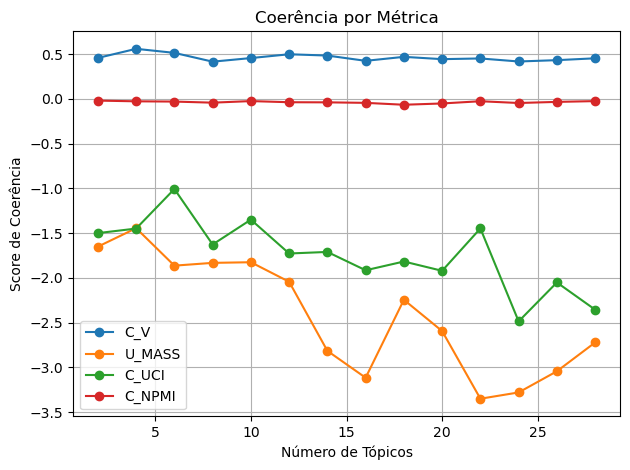


Resultados de Coerência para C_V:
Qtd. tópicos = 2 -> Coerência = 0.4571
Qtd. tópicos = 4 -> Coerência = 0.5587
Qtd. tópicos = 6 -> Coerência = 0.5136
Qtd. tópicos = 8 -> Coerência = 0.4153
Qtd. tópicos = 10 -> Coerência = 0.4556
Qtd. tópicos = 12 -> Coerência = 0.4981
Qtd. tópicos = 14 -> Coerência = 0.4835
Qtd. tópicos = 16 -> Coerência = 0.4247
Qtd. tópicos = 18 -> Coerência = 0.4692
Qtd. tópicos = 20 -> Coerência = 0.4434
Qtd. tópicos = 22 -> Coerência = 0.4512
Qtd. tópicos = 24 -> Coerência = 0.4173
Qtd. tópicos = 26 -> Coerência = 0.4322
Qtd. tópicos = 28 -> Coerência = 0.4529
Melhor número de tópicos segundo C_V: 4

Resultados de Coerência para U_MASS:
Qtd. tópicos = 2 -> Coerência = -1.6512
Qtd. tópicos = 4 -> Coerência = -1.4451
Qtd. tópicos = 6 -> Coerência = -1.8635
Qtd. tópicos = 8 -> Coerência = -1.8324
Qtd. tópicos = 10 -> Coerência = -1.8253
Qtd. tópicos = 12 -> Coerência = -2.0437
Qtd. tópicos = 14 -> Coerência = -2.8156
Qtd. tópicos = 16 -> Coerência = -3.1157
Qtd. tó

In [40]:

# Função para determinar a melhor quantidade de tópicos para a modelagem
def compute_coherence_values(dictionary, corpus_religiao, texts, coherence, limit=30, start=2, step=5):
    coherence_values = []
    model_list = []
    topic_range = list(range(start, limit, step))

    for num_topics in tqdm(topic_range, desc=f"Calculando coerência ({coherence})"):
        model = LdaMulticore(corpus=corpus_religiao, id2word=dictionary, num_topics=num_topics, passes=5, workers=4)
        model_list.append(model)

        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    optimal_index = coherence_values.index(max(coherence_values))
    optimal_num_topics = topic_range[optimal_index]
    return optimal_num_topics, model_list, coherence_values

# Calcular os valores de coerência para diferentes métricas
def calculate_coherence_for_metrics(dictionary, corpus_religiao, texts, metrics, start=2, limit=30, step=2):
    coherence_results = {}
    for metric in metrics:
        num_topics, model_list, coherence_values = compute_coherence_values(
            dictionary=dictionary,
            corpus_religiao=corpus_religiao,
            texts=texts,
            coherence=metric,
            start=start,
            limit=limit,
            step=step
        )
        coherence_results[metric] = {
            'num_topics': num_topics,
            'model_list': model_list,
            'coherence_values': coherence_values
        }
    return coherence_results

metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

# Calcular os valores de coerência 
coherence_results = calculate_coherence_for_metrics(
    dictionary=id2word_religiao,
    corpus_religiao=corpus_religiao,
    texts=texto_processado_religiao,
    metrics=metrics,
    start=2,
    limit=30,
    step=2
)

# Plotar os resultados de coerência para cada métrica
for metric in metrics:
    x = list(range(2, 30, 2))
    coherence_values = coherence_results[metric]['coherence_values']
    plt.plot(x, coherence_values, marker='o', label=metric.upper())

plt.xlabel("Número de Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(loc='best')
plt.title("Coerência por Métrica")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar os resultados de coerência para cada métrica
for metric in metrics:
    print(f"\nResultados de Coerência para {metric.upper()}:")
    for m, cv in zip(range(2, 30, 2), coherence_results[metric]['coherence_values']):
        print(f"Qtd. tópicos = {m} -> Coerência = {round(cv, 4)}")
    print(f"Melhor número de tópicos segundo {metric.upper()}: {coherence_results[metric]['num_topics']}")


In [41]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'u_mass'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_religiao, id2word_religiao)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.126608 -0.086852       1        1  40.323596
2     -0.119384 -0.083321       2        1  30.858505
0     -0.051697  0.204937       3        1  17.558046
3      0.297689 -0.034764       4        1  11.259852, topic_info=            Term          Freq         Total Category  logprob  loglift
91            55  13976.000000  13976.000000  Default  30.0000  30.0000
20232      phone  10255.000000  10255.000000  Default  29.0000  29.0000
389        grupo  10471.000000  10471.000000  Default  28.0000  28.0000
241    liberdade   8192.000000   8192.000000  Default  27.0000  27.0000
490         user   6294.000000   6294.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
196      familia   3298.360528   5810.194855   Topic4  -4.0519   1.6177
3395       paulo   1540.717453   2167.113703   Topic4  -4.8131   1.8428
4            bem   2956.764165   5802.753384   Topic4  -4.1612   1.5097
12          deus   3560.703188  26591.500471   Topic4  -3.9754   0.1733
309          sao   1575.255247   6319.632381   Topic4  -4.7909   0.7947

[362 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
37639      1  0.005840          001
37639      2  0.008760          001
37639      3  0.002920          001
37639      4  0.984073          001
10619      4  0.964458  01416155830
...      ...       ...          ...
4534       4  0.970380          you
2578       1  0.992203        youtu
2578       2  0.004203        youtu
2578       3  0.002010        youtu
2578       4  0.001462        youtu

[942 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

In [42]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_religiao))

Diversidade de Tópicos: 0.725
IRBO médio: 0.8149

Perplexidade:  -7.964266267480555


In [43]:
# Extrair tópicos (palavras e pesos)
topics_data = []
for topic_id, topic in lda_model.show_topics(formatted=False):
    for word, weight in topic:
        topics_data.append({
            'topic_id': topic_id,
            'word': word,
            'weight': weight
        })

# Criar DataFrame
topics_df = pd.DataFrame(topics_data)


# Salvar em CSV
topics_df.to_csv('./resultados_lda/telegram/lda_model_telegramComFiltroReligioso_u_mass.csv', index=False, encoding='utf-8')


In [44]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_v'  # ou 'u_mass', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_religiao, id2word_religiao)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.084196 -0.057259       1        1  39.196366
2      0.140043 -0.047698       2        1  26.350402
0     -0.194050 -0.089522       3        1  18.884993
3     -0.030188  0.194479       4        1  15.568238, topic_info=            Term          Freq         Total Category  logprob  loglift
91            55  12371.000000  12371.000000  Default  30.0000  30.0000
389        grupo  11231.000000  11231.000000  Default  29.0000  29.0000
241    liberdade   8528.000000   8528.000000  Default  28.0000  28.0000
2577          be   7072.000000   7072.000000  Default  27.0000  27.0000
2578       youtu   7028.000000   7028.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
652        fazer    863.593971   3308.255013   Topic4  -5.7160   0.5169
418   presidente    956.535506   6382.995445   Topic4  -5.6138  -0.0381
270         pais    819.569763   3769.146460   Topic4  -5.7683   0.3341
5067        link    816.761876   4056.603944   Topic4  -5.7717   0.2572
315           so    806.445873   4457.115427   Topic4  -5.7844   0.1503

[366 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
37639      1  0.993993      001
37639      2  0.002967      001
37639      4  0.002967      001
37338      1  0.993141     0207
37338      2  0.002862     0207
...      ...       ...      ...
7202       1  0.989233  welcome
2578       1  0.034858    youtu
2578       2  0.960644    youtu
2578       3  0.002703    youtu
2578       4  0.001850    youtu

[955 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4])

In [45]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_religiao))

Diversidade de Tópicos: 0.75
IRBO médio: 0.775

Perplexidade:  -8.048232359464238


In [46]:
# Extrair tópicos (palavras e pesos)
topics_data = []
for topic_id, topic in lda_model.show_topics(formatted=False):
    for word, weight in topic:
        topics_data.append({
            'topic_id': topic_id,
            'word': word,
            'weight': weight
        })

# Criar DataFrame
topics_df = pd.DataFrame(topics_data)


# Salvar em CSV
topics_df.to_csv('./resultados_lda/telegram/lda_model_telegramComFiltroReligioso_c_v.csv', index=False, encoding='utf-8')


In [47]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_uci'  # ou 'c_v', 'u_mass', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_religiao, id2word_religiao)
vis  


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.074377 -0.063513       1        1  25.716350
1     -0.052015 -0.043382       2        1  22.911587
0     -0.075908 -0.113590       3        1  16.699980
3     -0.035635 -0.036399       4        1  16.112076
4      0.327334  0.014555       5        1  12.126514
5     -0.089400  0.242329       6        1   6.433493, topic_info=            Term          Freq         Total Category  logprob  loglift
389        grupo  10703.000000  10703.000000  Default  30.0000  30.0000
91            55   9729.000000   9729.000000  Default  29.0000  29.0000
2577          be   5047.000000   5047.000000  Default  28.0000  28.0000
2578       youtu   5004.000000   5004.000000  Default  27.0000  27.0000
20232      phone   7105.000000   7105.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
155    comunismo    272.722601   1214.307758   Topic6  -5.9849   1.2502
290         povo    383.080974   5917.011211   Topic6  -5.6451   0.0063
828        jesus    366.366280   5472.182326   Topic6  -5.6897   0.0399
1673         vai    353.464537   4641.846729   Topic6  -5.7256   0.1686
809       cristo    280.660460   2021.710766   Topic6  -5.9562   0.7691

[554 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
34        1  0.400240       00
34        2  0.046280       00
34        3  0.059136       00
34        4  0.485945       00
34        5  0.002571       00
...     ...       ...      ...
3243      6  0.283610  youtube
6133      1  0.015645   zerado
6133      2  0.015645   zerado
6133      4  0.015645   zerado
6133      6  0.938703   zerado

[1871 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4, 5, 6])

In [48]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_religiao))

Diversidade de Tópicos: 0.7167
IRBO médio: 0.7405

Perplexidade:  -7.917121980892007


In [49]:
# Extrair tópicos (palavras e pesos)
topics_data = []
for topic_id, topic in lda_model.show_topics(formatted=False):
    for word, weight in topic:
        topics_data.append({
            'topic_id': topic_id,
            'word': word,
            'weight': weight
        })

# Criar DataFrame
topics_df = pd.DataFrame(topics_data)


# Salvar em CSV
topics_df.to_csv('./resultados_lda/telegram/lda_model_telegramComFiltroReligioso_c_uci.csv', index=False, encoding='utf-8')


In [50]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_npmi'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_religiao, id2word_religiao)
vis  


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.148274  0.0       1        1  73.112343
1     -0.148274  0.0       2        1  26.887657, topic_info=            Term          Freq         Total Category  logprob  loglift
91            55  13032.000000  13032.000000  Default  30.0000  30.0000
20232      phone   9561.000000   9561.000000  Default  29.0000  29.0000
241    liberdade   7907.000000   7907.000000  Default  28.0000  28.0000
389        grupo  10164.000000  10164.000000  Default  27.0000  27.0000
2578       youtu   5289.000000   5289.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
389        grupo   6333.603164  10164.578068   Topic2  -4.2699   0.8405
2344        lula   4652.927953   6895.961979   Topic2  -4.5783   0.9201
4            bem   3139.877046   5709.753944   Topic2  -4.9716   0.7155
12          deus   5381.462168  26745.403289   Topic2  -4.4328  -0.2899
137       brasil   3748.562949  11603.302102   Topic2  -4.7944   0.1836

[186 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
55         1  0.020911       222
55         2  0.979831       222
50673      1  0.010041  32712585
50673      2  0.994039  32712585
37490      1  0.999200       347
...      ...       ...       ...
1391       2  0.978273     vindo
491        1  0.979872      voce
491        2  0.020049      voce
2578       1  0.040082     youtu
2578       2  0.959891     youtu

[306 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [51]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_religiao))

Diversidade de Tópicos: 0.95
IRBO médio: 0.9154

Perplexidade:  -8.165035566910355


In [52]:
# Extrair tópicos (palavras e pesos)
topics_data = []
for topic_id, topic in lda_model.show_topics(formatted=False):
    for word, weight in topic:
        topics_data.append({
            'topic_id': topic_id,
            'word': word,
            'weight': weight
        })

# Criar DataFrame
topics_df = pd.DataFrame(topics_data)


# Salvar em CSV
topics_df.to_csv('./resultados_lda/telegram/lda_model_telegramComFiltroReligioso_c_npmi.csv', index=False, encoding='utf-8')


## Modelando os tópicos com filtro de inclusão religioso e exclusão de termas políticos

In [53]:
palavras_politicas = [ "lula", "bolsonaro", "pt", "pl", "stf", "patria", "55", "22", "13", "senadores", "lulaladrao",
                       "urnas", "alexandre", "moraes", "comunismo", "eleicao", "eleicoes", "esquerda", "direita",
                         "presidente", "tse", "fraude", "voto", "turno", "ministro"]

In [54]:
def retirar_mensagens_com_palavras_politicas(word):
    word_lower = word.lower()
    palavras_politica_lower = [palavra.lower() for palavra in palavras_politicas]

    return any(palavra in word_lower for palavra in palavras_politica_lower)


df_politico = df_religiao[~df_religiao['text_processed'].apply(lambda x: retirar_mensagens_com_palavras_politicas(x))]



In [55]:
df_politico.shape

(8566, 20)

In [56]:
df_politico.head()

,id_member_anonymous,id_group_anonymous,media,media_type,media_url,has_media,has_media_url,trava_zap,dataset_info_id,date_system,score_sentiment,score_misinformation,id_message,id_persona,message_type,messenger,media_name,media_md5,pre_processed_text,text_processed
date_message,,,,,,,,,,,,,,,,,,,,
2022-10-05 06:43:51,NaN,99561fb8c30a84c837927176b102d5d5,b9cf0b8950c9c0cf18c62f1904472cc1.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 06:43:54.882245,0.7096,0.090596,3632,Wanda Silva,Imagem,telegram,NaN,6a72ad1e5a9c7d7caf41ccaeddc35e52,feedback de mateus alves 29 anos brasil parana...,feedback mateus alves 29 anos brasil parana vo...
2022-10-05 08:56:25,d87aad01c33013334c184d741b3986ad,b11f2df64ac19aad47a50accf32052d6,NaN,NaN,NaN,False,False,False,5,2022-10-05 08:56:38.378482,0.9656,0.045114,157109,Wanda Silva,Texto,telegram,NaN,NaN,o senhor quando lembrou a jacó que o nome de j...,senhor lembrou jaco nome jaco ja nao jaco sim ...
2022-10-05 08:56:24,d87aad01c33013334c184d741b3986ad,b11f2df64ac19aad47a50accf32052d6,4ac8be9d59dea0e35ff866eb4d752db1.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 08:56:38.468746,0.6588,NaN,157101,Wanda Silva,Imagem,telegram,NaN,4ac8be9d59dea0e35ff866eb4d752db1,jacó lutou com deus e venceu - as duas casas d...,jaco lutou deus venceu duas casas israel prome...
2022-10-05 09:00:36,83f03c843a33c1933b0caf9252d97527,e3988dfe85b2ba2fa0499a428dd8a20a,NaN,NaN,NaN,False,False,False,5,2022-10-05 09:00:37.924377,0.9940,0.011129,451739,Wanda Silva,Texto,telegram,NaN,NaN,bom dia manter a esperança só quem mantém a ca...,bom dia manter esperanca so mantem caridade ma...
2022-10-05 09:07:29,NaN,43da8c10b93fb7c9078577a567f68ebc,bf38cc385ba2ab65d4facb176ef50c0b.jpg,image/jpg,NaN,True,False,False,5,2022-10-05 09:07:32.204094,0.9712,0.053206,899,Wanda Silva,Imagem,telegram,NaN,bf38cc385ba2ab65d4facb176ef50c0b,muito obrigado pelo seu feedback parabéns cont...,obrigado feedback parabens continue fazendo ne...


In [57]:
def processar_texto(texto):
    texto = texto.lower()
    palavras_texto = token_espaco.tokenize(texto)
    palavras_texto = token_pontuacao.tokenize(' '.join(palavras_texto))
    return [palavra for palavra in palavras_texto ]

texto_processado_politico = df_politico['text_processed'].apply(processar_texto)

In [58]:
# Criar dicionário
id2word_politico = corpora.Dictionary(texto_processado_politico)
# Criar o Corpus: A Frequência das palavras nos documentos
corpus_politico = [id2word_politico.doc2bow(text) for text in texto_processado_politico]

Calculando coerência (c_npmi): 100%|██████████| 14/14 [07:14<00:00, 31.03s/it]


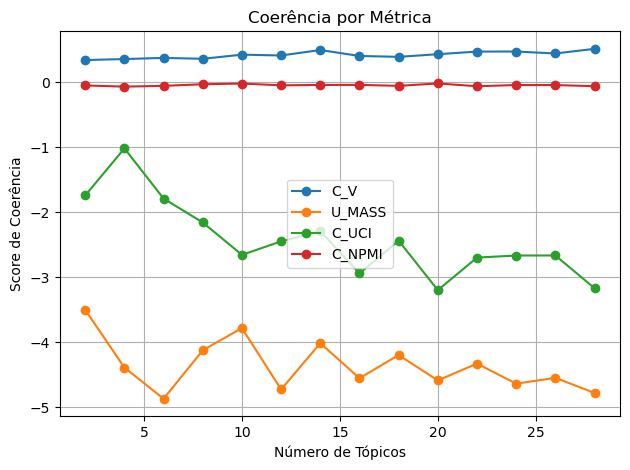


Resultados de Coerência para C_V:
Qtd. tópicos = 2 -> Coerência = 0.3449
Qtd. tópicos = 4 -> Coerência = 0.3606
Qtd. tópicos = 6 -> Coerência = 0.3781
Qtd. tópicos = 8 -> Coerência = 0.3645
Qtd. tópicos = 10 -> Coerência = 0.4282
Qtd. tópicos = 12 -> Coerência = 0.4154
Qtd. tópicos = 14 -> Coerência = 0.4995
Qtd. tópicos = 16 -> Coerência = 0.408
Qtd. tópicos = 18 -> Coerência = 0.3945
Qtd. tópicos = 20 -> Coerência = 0.4351
Qtd. tópicos = 22 -> Coerência = 0.4755
Qtd. tópicos = 24 -> Coerência = 0.4764
Qtd. tópicos = 26 -> Coerência = 0.4462
Qtd. tópicos = 28 -> Coerência = 0.5179
Melhor número de tópicos segundo C_V: 28

Resultados de Coerência para U_MASS:
Qtd. tópicos = 2 -> Coerência = -3.5004
Qtd. tópicos = 4 -> Coerência = -4.3871
Qtd. tópicos = 6 -> Coerência = -4.867
Qtd. tópicos = 8 -> Coerência = -4.1215
Qtd. tópicos = 10 -> Coerência = -3.7799
Qtd. tópicos = 12 -> Coerência = -4.7243
Qtd. tópicos = 14 -> Coerência = -4.012
Qtd. tópicos = 16 -> Coerência = -4.5513
Qtd. tópi

In [59]:

# Função para determinar a melhor quantidade de tópicos para a modelagem
def compute_coherence_values(dictionary, corpus_politico, texts, coherence, limit=30, start=2, step=5):
    coherence_values = []
    model_list = []
    topic_range = list(range(start, limit, step))

    for num_topics in tqdm(topic_range, desc=f"Calculando coerência ({coherence})"):
        model = LdaMulticore(corpus=corpus_politico, id2word=dictionary, num_topics=num_topics, passes=5, workers=4)
        model_list.append(model)

        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
        coherence_values.append(coherencemodel.get_coherence())

    optimal_index = coherence_values.index(max(coherence_values))
    optimal_num_topics = topic_range[optimal_index]
    return optimal_num_topics, model_list, coherence_values

# Calcular os valores de coerência para diferentes métricas
def calculate_coherence_for_metrics(dictionary, corpus_politico, texts, metrics, start=2, limit=30, step=2):
    coherence_results = {}
    for metric in metrics:
        num_topics, model_list, coherence_values = compute_coherence_values(
            dictionary=dictionary,
            corpus_politico=corpus_politico,
            texts=texts,
            coherence=metric,
            start=start,
            limit=limit,
            step=step
        )
        coherence_results[metric] = {
            'num_topics': num_topics,
            'model_list': model_list,
            'coherence_values': coherence_values
        }
    return coherence_results

metrics = ['c_v', 'u_mass', 'c_uci', 'c_npmi']

# Calcular os valores de coerência 
coherence_results = calculate_coherence_for_metrics(
    dictionary=id2word_politico,
    corpus_politico=corpus_politico,
    texts=texto_processado_politico,
    metrics=metrics,
    start=2,
    limit=30,
    step=2
)

# Plotar os resultados de coerência para cada métrica
for metric in metrics:
    x = list(range(2, 30, 2))
    coherence_values = coherence_results[metric]['coherence_values']
    plt.plot(x, coherence_values, marker='o', label=metric.upper())

plt.xlabel("Número de Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(loc='best')
plt.title("Coerência por Métrica")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar os resultados de coerência para cada métrica
for metric in metrics:
    print(f"\nResultados de Coerência para {metric.upper()}:")
    for m, cv in zip(range(2, 30, 2), coherence_results[metric]['coherence_values']):
        print(f"Qtd. tópicos = {m} -> Coerência = {round(cv, 4)}")
    print(f"Melhor número de tópicos segundo {metric.upper()}: {coherence_results[metric]['num_topics']}")


In [60]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'u_mass'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_politico, id2word_politico)
vis  



PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.124348  0.0       1        1  66.178168
1     -0.124348  0.0       2        1  33.821832, topic_info=         Term         Freq        Total Category  logprob  loglift
413         t  1071.000000  1071.000000  Default  30.0000  30.0000
6      brasil  1101.000000  1101.000000  Default  29.0000  29.0000
342     todos  1577.000000  1577.000000  Default  28.0000  28.0000
248      nada   801.000000   801.000000  Default  27.0000  27.0000
1132  youtube   574.000000   574.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
3        aqui   301.290852   769.549784   Topic2  -5.5140   0.1463
17       voce   428.779855  2578.797621   Topic2  -5.1611  -0.7101
649      tudo   337.161986  1281.851222   Topic2  -5.4015  -0.2514
419   empresa   246.693896   472.778314   Topic2  -5.7139   0.4336
237       dia   268.477784  1268.838726   Topic2  -5.6293  -0.4690

[182 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
28        1  0.984864  abencoando
28        2  0.011866  abencoando
259       1  0.826245     abencoe
259       2  0.173763     abencoe
2343      1  0.067894      acabou
...     ...       ...         ...
17        2  0.166357        voce
435       1  0.394411       youtu
435       2  0.606315       youtu
1132      1  0.094016     youtube
1132      2  0.905342     youtube

[283 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

In [61]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_politico))

Diversidade de Tópicos: 0.85
IRBO médio: 0.558

Perplexidade:  -8.235963459626264


In [62]:
# Extrair tópicos (palavras e pesos)
topics_data = []
for topic_id, topic in lda_model.show_topics(formatted=False):
    for word, weight in topic:
        topics_data.append({
            'topic_id': topic_id,
            'word': word,
            'weight': weight
        })

# Criar DataFrame
topics_df = pd.DataFrame(topics_data)


# Salvar em CSV
topics_df.to_csv('./resultados_lda/telegram/lda_model_telegramComFiltroPolitico_u_mass.csv', index=False, encoding='utf-8')


In [63]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_v'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_politico, id2word_politico)
vis  



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
20    -0.126170  0.090134       1        1  24.276588
18    -0.050965 -0.005209       2        1   6.152418
26    -0.074731  0.110876       3        1   4.988908
9      0.006908 -0.038514       4        1   4.301616
21    -0.175737 -0.155196       5        1   4.229608
22    -0.107582 -0.072875       6        1   3.719056
10    -0.079657  0.081807       7        1   3.631379
15    -0.006511  0.019194       8        1   3.607953
14    -0.054309 -0.141534       9        1   3.539630
16    -0.056593  0.109719      10        1   3.209168
7     -0.090649  0.056522      11        1   2.946654
3     -0.072051  0.136753      12        1   2.946303
6      0.050165  0.119479      13        1   2.806752
23    -0.005869  0.093277      14        1   2.502515
5      0.152690  0.013305      15        1   2.415836
12     0.175838 -0.078481      16        1   2.347618
25    -0.017088 -0.170324      17        1   2.170711
0     -0.017776 -0.161476      18        1   2.157321
2      0.006629  0.041185      19        1   2.122848
8      0.143239 -0.080802      20        1   2.104014
1     -0.016080 -0.045633      21        1   2.068599
24    -0.088967 -0.113695      22        1   2.041139
17    -0.081632  0.060803      23        1   1.969671
13     0.031289  0.109716      24        1   1.827648
4      0.154625  0.028062      25        1   1.749941
19     0.174978  0.065232      26        1   1.687984
11     0.122188 -0.056323      27        1   1.611373
27     0.103817 -0.016004      28        1   0.866752, topic_info=          Term         Freq        Total Category  logprob  loglift
62        deus  8024.000000  8024.000000  Default  30.0000  30.0000
982     existe   862.000000   862.000000  Default  29.0000  29.0000
18668  repitam   801.000000   801.000000  Default  28.0000  28.0000
8       comigo  1003.000000  1003.000000  Default  27.0000  27.0000
16        user  1680.000000  1680.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1637      cada    10.574096   399.824146  Topic28  -5.1996   1.1156
48       canal    10.830885   664.383413  Topic28  -5.1756   0.6317
1093     agora     9.169175   633.793390  Topic28  -5.3421   0.5123
16        user     9.870845  1680.590658  Topic28  -5.2684  -0.3891
145        nao     5.860525  5413.823933  Topic28  -5.7897  -2.0803

[1754 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
7160      28  0.478731       07
18         1  0.432820        1
18         2  0.003971        1
18         3  0.015883        1
18         4  0.115154        1
...      ...       ...      ...
1132      23  0.004184  youtube
1132      25  0.002092  youtube
20830     21  0.920020    yuval
15402      3  0.945644   zapzap
20932      5  0.924660       zp

[5723 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 19, 27, 10, 22, 23, 11, 16, 15, 17, 8, 4, 7, 24, 6, 13, 26, 1, 3, 9, 2, 25, 18, 14, 5, 20, 12, 28])

In [64]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_politico))

Diversidade de Tópicos: 0.6036
IRBO médio: 0.8496

Perplexidade:  -8.206852348081211


In [65]:
# Extrair tópicos (palavras e pesos)
topics_data = []
for topic_id, topic in lda_model.show_topics(formatted=False):
    for word, weight in topic:
        topics_data.append({
            'topic_id': topic_id,
            'word': word,
            'weight': weight
        })

# Criar DataFrame
topics_df = pd.DataFrame(topics_data)


# Salvar em CSV
topics_df.to_csv('./resultados_lda/telegram/lda_model_telegramComFiltroPolitico_c_v.csv', index=False, encoding='utf-8')


In [66]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_uci'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_politico, id2word_politico)
vis  



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.075992  0.034837       1        1  37.841380
1     -0.013139 -0.135677       2        1  21.929574
3      0.074002  0.044440       3        1  21.775306
2     -0.136855  0.056400       4        1  18.453740, topic_info=          Term         Freq        Total Category  logprob  loglift
982     existe  1394.000000  1394.000000  Default  30.0000  30.0000
18668  repitam  1304.000000  1304.000000  Default  29.0000  29.0000
8       comigo  1466.000000  1466.000000  Default  28.0000  28.0000
16        user  1220.000000  1220.000000  Default  27.0000  27.0000
62        deus  8197.000000  8197.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
342      todos   207.583843  1455.105004   Topic4  -5.2807  -0.2574
171        pra   163.726910   624.446719   Topic4  -5.5180   0.3512
15        pode   159.227633   578.757739   Topic4  -5.5459   0.3994
248       nada   154.668616   583.459491   Topic4  -5.5749   0.3622
200     senhor   158.684490  1063.499031   Topic4  -5.5493  -0.2125

[361 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
0          1  0.014179       29
0          2  0.014179       29
0          3  0.850743       29
0          4  0.127611       29
16458      2  0.062189       85
...      ...       ...      ...
435        4  0.188653    youtu
1132       1  0.207435  youtube
1132       2  0.005252  youtube
1132       3  0.666943  youtube
1132       4  0.120785  youtube

[868 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3])

In [67]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_politico))

Diversidade de Tópicos: 0.65
IRBO médio: 0.4561

Perplexidade:  -8.000967017301791


In [68]:
# Extrair tópicos (palavras e pesos)
topics_data = []
for topic_id, topic in lda_model.show_topics(formatted=False):
    for word, weight in topic:
        topics_data.append({
            'topic_id': topic_id,
            'word': word,
            'weight': weight
        })

# Criar DataFrame
topics_df = pd.DataFrame(topics_data)


# Salvar em CSV
topics_df.to_csv('./resultados_lda/telegram/lda_model_telegramComFiltroPolitico_c_uci.csv', index=False, encoding='utf-8')


In [69]:

pyLDAvis.enable_notebook()  

# Escolher a métrica para visualizar
chosen_metric = 'c_npmi'  # ou 'c_v', 'c_uci', 'c_npmi'

# Obter o melhor modelo já treinado
best_index = coherence_results[chosen_metric]['coherence_values'].index(
    max(coherence_results[chosen_metric]['coherence_values'])
)
lda_model = coherence_results[chosen_metric]['model_list'][best_index]

# Gerar a visualização
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_politico, id2word_politico)
vis  



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17    -0.002702  0.029487       1        1  20.947338
18     0.011462  0.121716       2        1   7.954716
5     -0.083868  0.061289       3        1   6.992655
13     0.086436 -0.019458       4        1   6.330462
12     0.003823  0.026289       5        1   5.858908
16    -0.110612  0.065248       6        1   5.439021
6      0.199784  0.004038       7        1   4.660254
3     -0.083579  0.045010       8        1   4.441031
11     0.047042 -0.084789       9        1   4.003564
15    -0.058307 -0.015531      10        1   3.916086
14    -0.026801 -0.060527      11        1   3.699784
4     -0.038376 -0.004853      12        1   3.570084
1     -0.033752  0.092409      13        1   3.367852
2      0.165083 -0.080612      14        1   3.292520
10    -0.023347  0.044325      15        1   3.209175
0     -0.117564  0.104380      16        1   2.817123
9      0.097274  0.102049      17        1   2.719332
19     0.208382 -0.045072      18        1   2.495719
8     -0.118657 -0.280506      19        1   2.186438
7     -0.121720 -0.104893      20        1   2.097939, topic_info=           Term         Freq        Total Category  logprob  loglift
982      existe  1011.000000  1011.000000  Default  30.0000  30.0000
18668   repitam   940.000000   940.000000  Default  29.0000  29.0000
8        comigo  1118.000000  1118.000000  Default  28.0000  28.0000
266    obrigado  1125.000000  1125.000000  Default  27.0000  27.0000
62         deus  7845.000000  7845.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
249      oracao    44.564671   301.918577  Topic20  -4.6450   1.9510
200      senhor    47.921237  1172.450008  Topic20  -4.5724   0.6669
1093      agora    45.748601   540.708571  Topic20  -4.6188   1.3945
165       poder    44.191911   485.691040  Topic20  -4.6534   1.4672
145         nao    44.150147  5484.324832  Topic20  -4.6543  -0.9578

[1309 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
5688       6  0.057467      100
5688      14  0.057467      100
5688      19  0.862002      100
2693       2  0.027893       14
2693       3  0.009298       14
...      ...       ...      ...
1132      16  0.025178  youtube
1132      19  0.333130  youtube
1132      20  0.003874  youtube
15402     17  0.912705   zapzap
20932      4  0.945267       zp

[4344 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 19, 6, 14, 13, 17, 7, 4, 12, 16, 15, 5, 2, 3, 11, 1, 10, 20, 9, 8])

In [70]:
div = topic_diversity(lda_model)
print(f"Diversidade de Tópicos: {round(div, 4)}")

irbo = compute_irbo(lda_model)
print(f"IRBO médio: {round(irbo, 4)}")

# Computar a perplexidade do modelo (quanto menor, melhor)
print('\nPerplexidade: ', lda_model.log_perplexity(corpus_politico))

Diversidade de Tópicos: 0.605
IRBO médio: 0.7841

Perplexidade:  -8.209079505144697


In [71]:
# Extrair tópicos (palavras e pesos)
topics_data = []
for topic_id, topic in lda_model.show_topics(formatted=False):
    for word, weight in topic:
        topics_data.append({
            'topic_id': topic_id,
            'word': word,
            'weight': weight
        })

# Criar DataFrame
topics_df = pd.DataFrame(topics_data)


# Salvar em CSV
topics_df.to_csv('./resultados_lda/telegram/lda_model_telegramComFiltroPolitico_c_npmi.csv', index=False, encoding='utf-8')
